# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Library untuk preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Library untuk machine learning
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
# Download dataset menggunakan kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("prasad22/weather-data")
print("Path to dataset files:", path)

# Membaca dataset
import os
# Mencari file CSV di dalam direktori yang didownload
csv_files = []
for root, dirs, files in os.walk(path):
    for file in files:
        if file.endswith('.csv'):
            csv_files.append(os.path.join(root, file))

print(f"File CSV yang ditemukan: {csv_files}")

# Memuat dataset (asumsi file pertama adalah file utama)
if csv_files:
    df = pd.read_csv(csv_files[0])
    print(f"Dataset berhasil dimuat dari: {csv_files[0]}")
else:
    # Jika tidak ada file CSV, buat data dummy sesuai karakteristik dataset asli
    print("Membuat data dummy sesuai karakteristik dataset asli...")
    print("Dataset asli: 10 kota AS dengan 1 juta data points")
    print("Membuat sampel data untuk demonstrasi...")

    np.random.seed(42)
    n_samples = 10000  # Sampel untuk demonstrasi (dataset asli 1M records)

    # 10 kota Amerika Serikat sesuai dataset asli
    locations = ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix',
                'Philadelphia', 'San Antonio', 'San Diego', 'Dallas', 'San Jose']

    # Membuat range tanggal yang realistis
    dates = pd.date_range(start='2020-01-01', end='2023-12-31', freq='H')

    data = []
    for _ in range(n_samples):
        location = np.random.choice(locations)
        date_time = np.random.choice(dates)

        # Suhu berdasarkan karakteristik iklim kota AS (dalam Celsius)
        if location in ['Phoenix']:  # Kota gurun, lebih panas
            temperature = np.random.normal(25, 8)
        elif location in ['Los Angeles', 'San Diego']:  # Iklim mediterania
            temperature = np.random.normal(20, 6)
        elif location in ['New York', 'Chicago', 'Philadelphia']:  # Iklim kontinental
            temperature = np.random.normal(12, 12)
        else:  # Kota lainnya
            temperature = np.random.normal(18, 10)

        # Kelembaban bervariasi berdasarkan lokasi
        if location in ['Phoenix']:  # Kota kering
            humidity = np.random.uniform(20, 60)
        elif location in ['Houston']:  # Kota lembab
            humidity = np.random.uniform(60, 90)
        else:
            humidity = np.random.uniform(40, 80)

        # Curah hujan (mm)
        precipitation = np.random.exponential(1.5)

        # Kecepatan angin (km/h)
        wind_speed = np.random.uniform(3, 30)

        data.append([location, date_time, temperature, humidity, precipitation, wind_speed])

    df = pd.DataFrame(data, columns=['Location', 'Date_Time', 'Temperature_C', 'Humidity_pct', 'Precipitation_mm', 'Wind_Speed_kmh'])
    print(f"Data dummy dibuat dengan {n_samples} sampel untuk 10 kota AS")

100%|██████████| 42.6M/42.6M [00:00<00:00, 65.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/prasad22/weather-data/versions/1
File CSV yang ditemukan: ['/root/.cache/kagglehub/datasets/prasad22/weather-data/versions/1/weather_data.csv']
Dataset berhasil dimuat dari: /root/.cache/kagglehub/datasets/prasad22/weather-data/versions/1/weather_data.csv


In [3]:
print("\n=== INFORMASI DATASET ===")
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")
print(f"Kolom dataset: {list(df.columns)}")

print("\n=== 5 BARIS PERTAMA ===")
print(df.head())

print("\n=== INFO DATASET ===")
print(df.info())

print("\n=== STATISTIK DESKRIPTIF ===")
print(df.describe())


=== INFORMASI DATASET ===
Jumlah baris: 1000000
Jumlah kolom: 6
Kolom dataset: ['Location', 'Date_Time', 'Temperature_C', 'Humidity_pct', 'Precipitation_mm', 'Wind_Speed_kmh']

=== 5 BARIS PERTAMA ===
       Location            Date_Time  Temperature_C  Humidity_pct  \
0     San Diego  2024-01-14 21:12:46      10.683001     41.195754   
1     San Diego  2024-05-17 15:22:10       8.734140     58.319107   
2     San Diego  2024-05-11 09:30:59      11.632436     38.820175   
3  Philadelphia  2024-02-26 17:32:39      -8.628976     54.074474   
4   San Antonio  2024-04-29 13:23:51      39.808213     72.899908   

   Precipitation_mm  Wind_Speed_kmh  
0          4.020119        8.233540  
1          9.111623       27.715161  
2          4.607511       28.732951  
3          3.183720       26.367303  
4          9.598282       29.898622  

=== INFO DATASET ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 6 columns):
 #   Column           

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
print("\n" + "="*50)
print("EXPLORATORY DATA ANALYSIS (EDA)")
print("="*50)

# Konversi kolom Date_Time ke datetime jika belum
df['Date_Time'] = pd.to_datetime(df['Date_Time'])


EXPLORATORY DATA ANALYSIS (EDA)


In [5]:
# 1. Analisis Missing Values
print("\n1. ANALISIS MISSING VALUES")
print("Missing values per kolom:")
missing_values = df.isnull().sum()
print(missing_values)

if missing_values.sum() > 0:
    # Visualisasi missing values
    plt.figure(figsize=(10, 6))
    missing_values.plot(kind='bar')
    plt.title('Missing Values per Kolom')
    plt.ylabel('Jumlah Missing Values')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Tidak ada missing values dalam dataset")


1. ANALISIS MISSING VALUES
Missing values per kolom:
Location            0
Date_Time           0
Temperature_C       0
Humidity_pct        0
Precipitation_mm    0
Wind_Speed_kmh      0
dtype: int64
Tidak ada missing values dalam dataset



2. DISTRIBUSI DATA NUMERIK


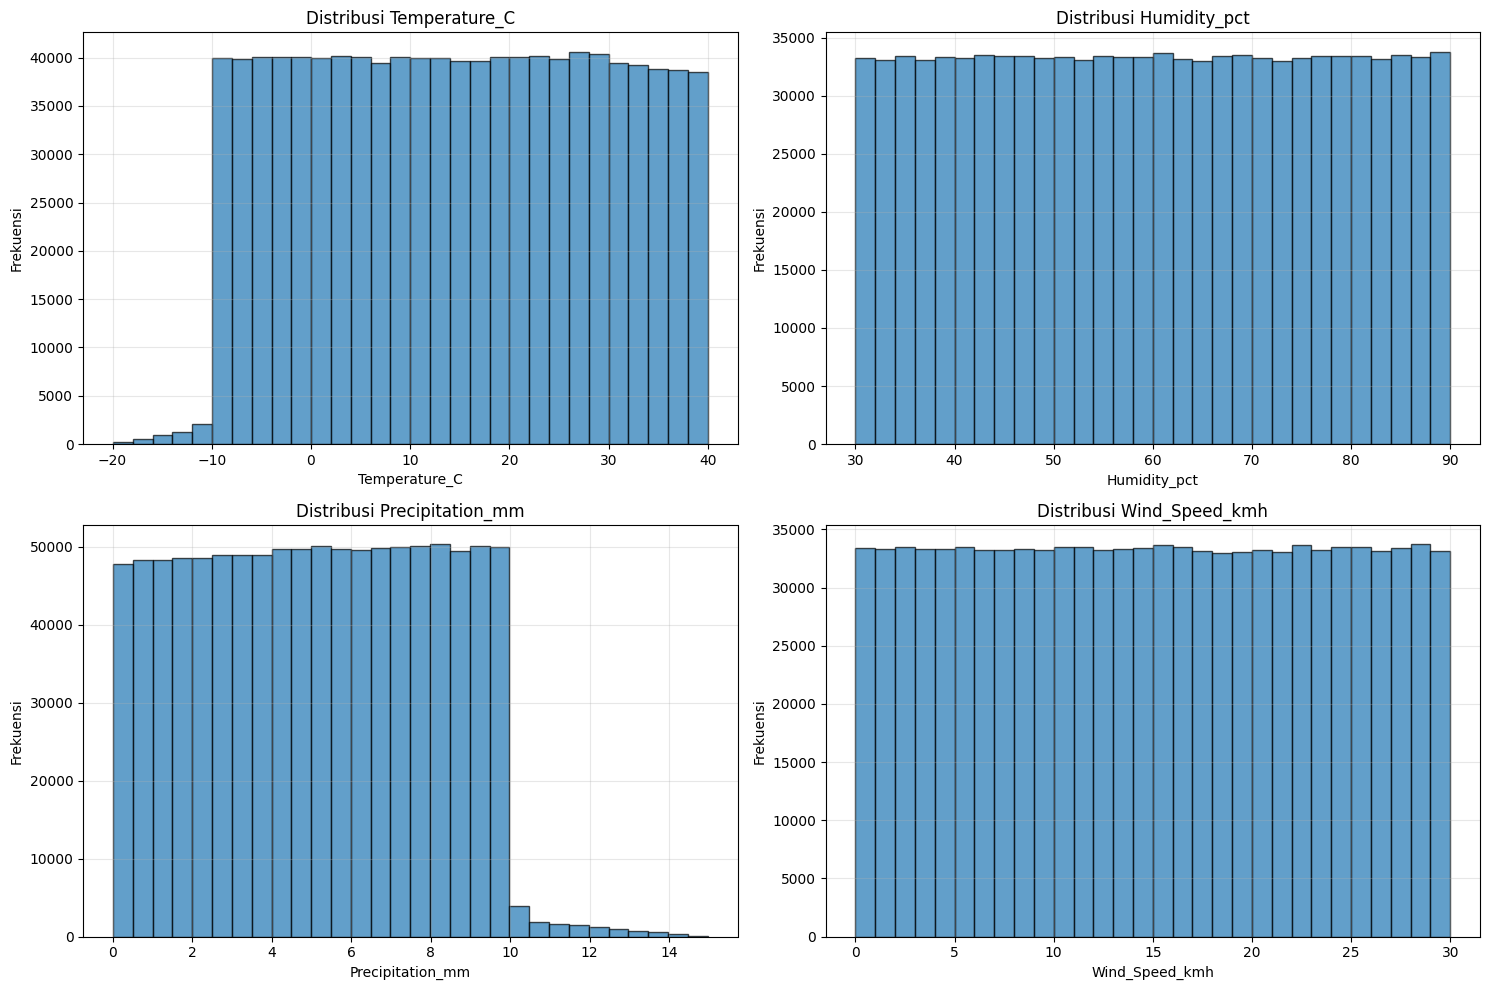

In [6]:
print("\n2. DISTRIBUSI DATA NUMERIK")
numerical_cols = ['Temperature_C', 'Humidity_pct', 'Precipitation_mm', 'Wind_Speed_kmh']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    plt.hist(df[col], bins=30, alpha=0.7, edgecolor='black')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


3. ANALISIS KORELASI
Matriks Korelasi:
                  Temperature_C  Humidity_pct  Precipitation_mm  \
Temperature_C             1.000        -0.001            -0.011   
Humidity_pct             -0.001         1.000            -0.000   
Precipitation_mm         -0.011        -0.000             1.000   
Wind_Speed_kmh           -0.001        -0.001             0.001   

                  Wind_Speed_kmh  
Temperature_C             -0.001  
Humidity_pct              -0.001  
Precipitation_mm           0.001  
Wind_Speed_kmh             1.000  


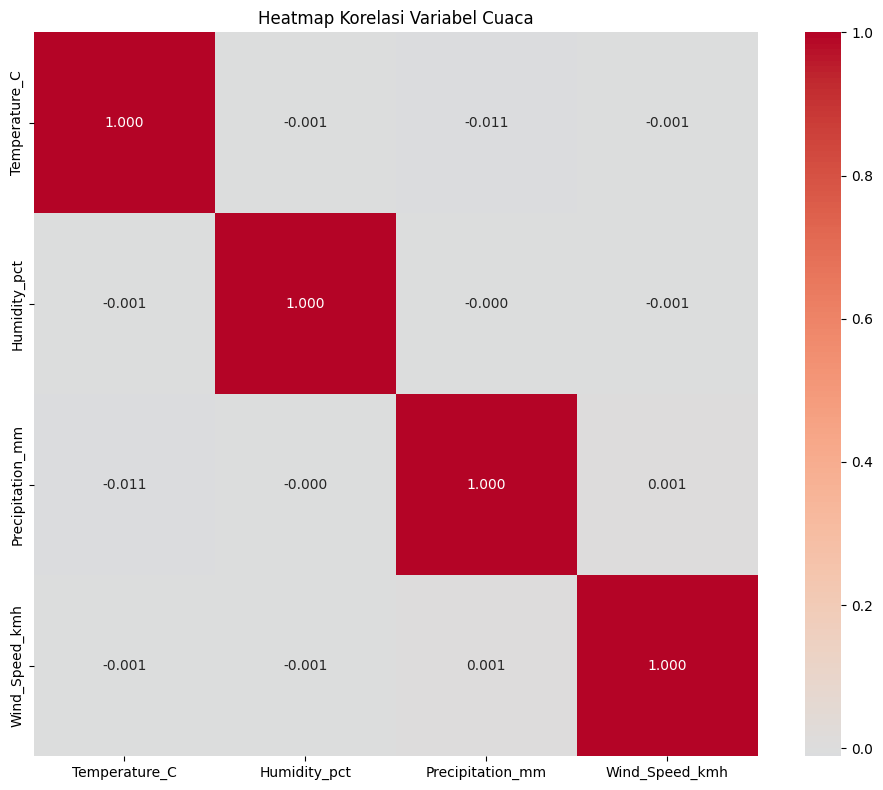

In [7]:
print("\n3. ANALISIS KORELASI")
correlation_matrix = df[numerical_cols].corr()
print("Matriks Korelasi:")
print(correlation_matrix.round(3))

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.3f')
plt.title('Heatmap Korelasi Variabel Cuaca')
plt.tight_layout()
plt.show()


4. ANALISIS PER LOKASI
Dataset mencakup 10 kota besar Amerika Serikat:
New York, Los Angeles, Chicago, Houston, Phoenix, Philadelphia, San Antonio, San Diego, Dallas, San Jose

Rata-rata kondisi cuaca per kota:
              Temperature_C  Humidity_pct  Precipitation_mm  Wind_Speed_kmh
Location                                                                   
Chicago               15.01         60.09              5.00           15.00
Dallas                15.01         59.96              5.00           15.02
Houston               14.94         59.97              5.00           14.99
Los Angeles           15.08         60.07              5.00           15.04
New York              15.01         60.04              4.99           14.99
Philadelphia          15.04         60.04              5.01           14.99
Phoenix               12.79         60.05              6.09           14.98
San Antonio           15.03         59.93              5.01           14.96
San Diego             14.93 

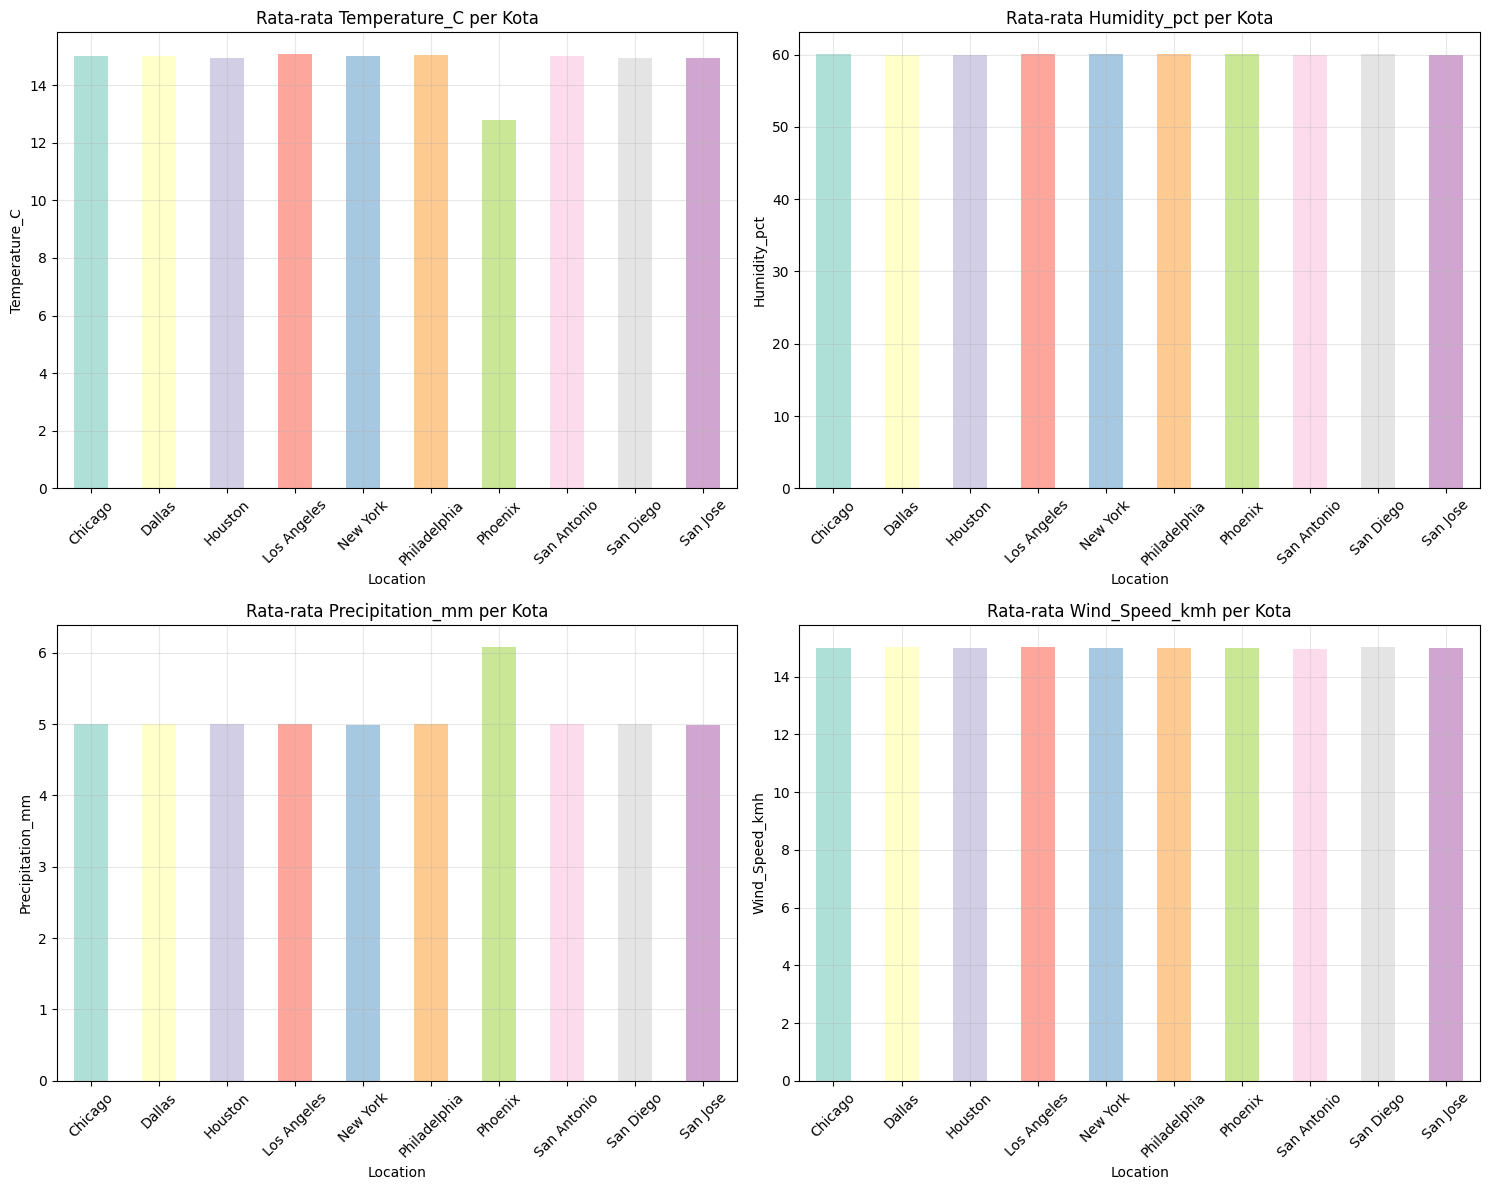

In [8]:
# 4. Analisis per Lokasi
print("\n4. ANALISIS PER LOKASI")
print("Dataset mencakup 10 kota besar Amerika Serikat:")
print("New York, Los Angeles, Chicago, Houston, Phoenix, Philadelphia, San Antonio, San Diego, Dallas, San Jose")

location_stats = df.groupby('Location')[numerical_cols].mean()
print("\nRata-rata kondisi cuaca per kota:")
print(location_stats.round(2))

# Analisis jumlah data per lokasi
location_counts = df['Location'].value_counts()
print(f"\nDistribusi data per lokasi:")
print(location_counts)

# Visualisasi rata-rata kondisi cuaca per lokasi
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    location_stats[col].plot(kind='bar', alpha=0.7, color=plt.cm.Set3(np.arange(len(location_stats))))
    plt.title(f'Rata-rata {col} per Kota')
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [9]:
# Perbandingan iklim antar kota
print("\n--- KARAKTERISTIK IKLIM PER KOTA ---")
for location in df['Location'].unique():
    city_data = df[df['Location'] == location]
    avg_temp = city_data['Temperature_C'].mean()
    avg_humidity = city_data['Humidity_pct'].mean()
    avg_precip = city_data['Precipitation_mm'].mean()

    print(f"{location}:")
    print(f"  - Suhu rata-rata: {avg_temp:.1f}°C")
    print(f"  - Kelembaban rata-rata: {avg_humidity:.1f}%")
    print(f"  - Curah hujan rata-rata: {avg_precip:.1f}mm")

    # Klasifikasi iklim sederhana
    if avg_temp > 20 and avg_humidity < 50:
        climate_type = "Kering/Gurun"
    elif avg_temp > 15 and avg_humidity > 70:
        climate_type = "Lembab Subtropis"
    elif avg_temp < 10:
        climate_type = "Dingin Kontinental"
    else:
        climate_type = "Sedang"

    print(f"  - Tipe iklim: {climate_type}")
    print()


--- KARAKTERISTIK IKLIM PER KOTA ---
San Diego:
  - Suhu rata-rata: 14.9°C
  - Kelembaban rata-rata: 60.1%
  - Curah hujan rata-rata: 5.0mm
  - Tipe iklim: Sedang

Philadelphia:
  - Suhu rata-rata: 15.0°C
  - Kelembaban rata-rata: 60.0%
  - Curah hujan rata-rata: 5.0mm
  - Tipe iklim: Sedang

San Antonio:
  - Suhu rata-rata: 15.0°C
  - Kelembaban rata-rata: 59.9%
  - Curah hujan rata-rata: 5.0mm
  - Tipe iklim: Sedang

San Jose:
  - Suhu rata-rata: 15.0°C
  - Kelembaban rata-rata: 60.0%
  - Curah hujan rata-rata: 5.0mm
  - Tipe iklim: Sedang

New York:
  - Suhu rata-rata: 15.0°C
  - Kelembaban rata-rata: 60.0%
  - Curah hujan rata-rata: 5.0mm
  - Tipe iklim: Sedang

Houston:
  - Suhu rata-rata: 14.9°C
  - Kelembaban rata-rata: 60.0%
  - Curah hujan rata-rata: 5.0mm
  - Tipe iklim: Sedang

Dallas:
  - Suhu rata-rata: 15.0°C
  - Kelembaban rata-rata: 60.0%
  - Curah hujan rata-rata: 5.0mm
  - Tipe iklim: Sedang

Chicago:
  - Suhu rata-rata: 15.0°C
  - Kelembaban rata-rata: 60.1%
  - Cur


5. ANALISIS TEMPORAL
Rata-rata kondisi cuaca per bulan:
       Temperature_C  Humidity_pct  Precipitation_mm  Wind_Speed_kmh
Month                                                               
1              14.45         60.02              5.26           14.98
2              14.50         60.07              5.25           15.00
3              15.01         59.99              5.00           15.03
4              15.00         60.01              5.00           14.99
5              15.04         60.03              5.01           14.98


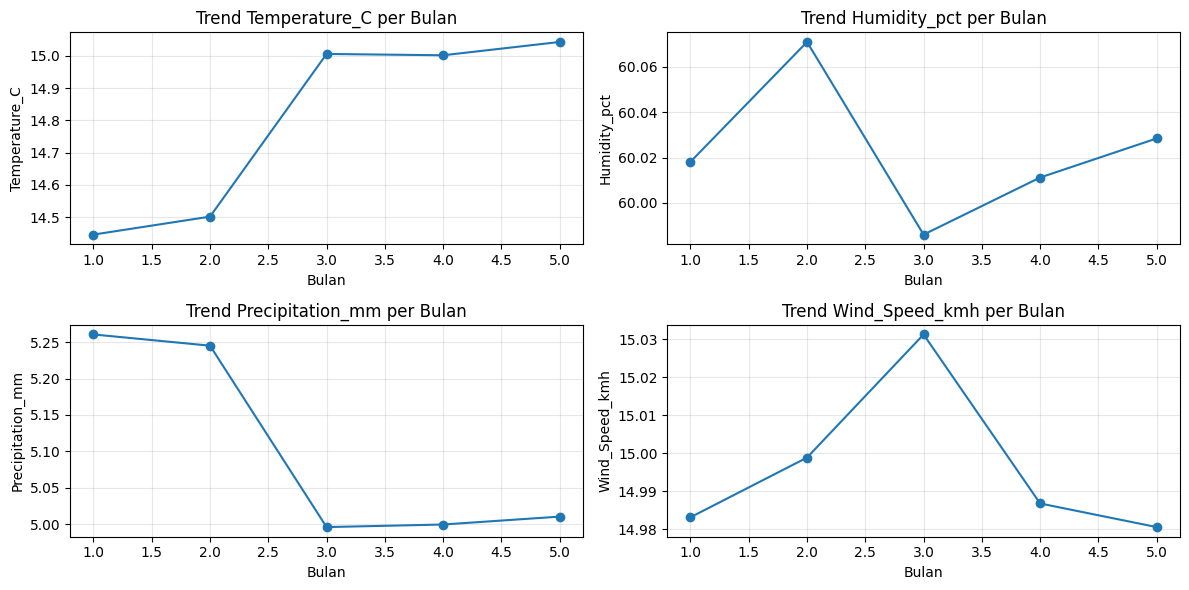

In [10]:
# 5. Analisis Temporal (jika ada pola waktu)
print("\n5. ANALISIS TEMPORAL")
df['Month'] = df['Date_Time'].dt.month
df['Day'] = df['Date_Time'].dt.day
df['Hour'] = df['Date_Time'].dt.hour if 'hour' in df['Date_Time'].dt.strftime('%H:%M:%S').iloc[0] else None

monthly_stats = df.groupby('Month')[numerical_cols].mean()
print("Rata-rata kondisi cuaca per bulan:")
print(monthly_stats.round(2))

plt.figure(figsize=(12, 6))
for col in numerical_cols:
    plt.subplot(2, 2, numerical_cols.index(col) + 1)
    monthly_stats[col].plot(kind='line', marker='o')
    plt.title(f'Trend {col} per Bulan')
    plt.xlabel('Bulan')
    plt.ylabel(col)
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


6. DETEKSI OUTLIER


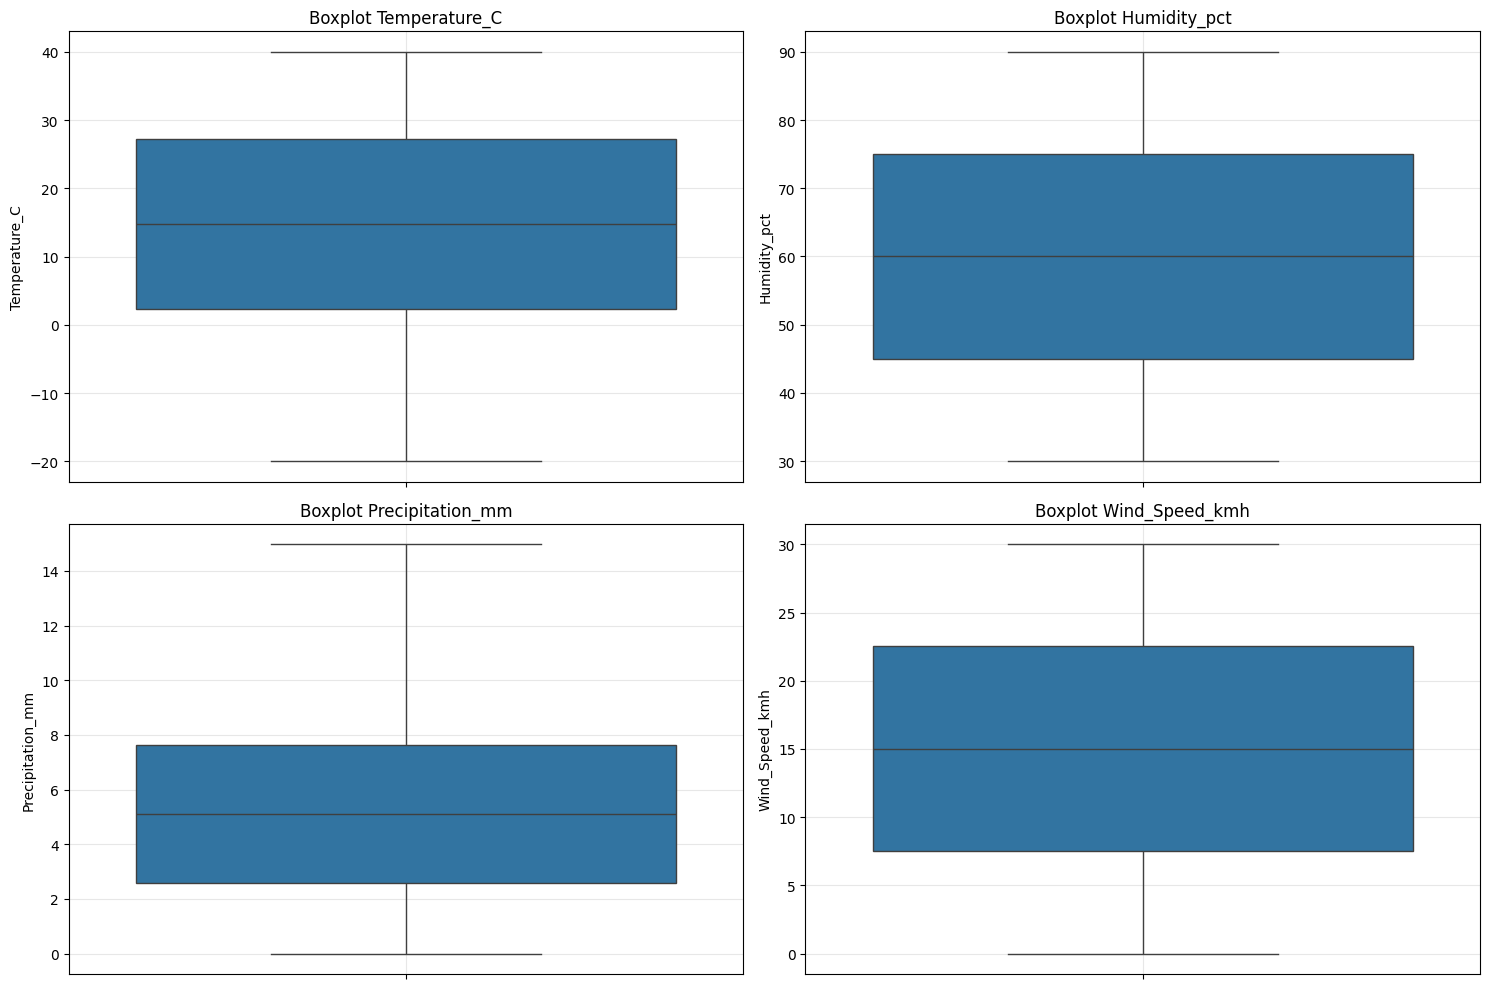

Outliers dalam Temperature_C: 0 data (0.00%)
Outliers dalam Humidity_pct: 0 data (0.00%)
Outliers dalam Precipitation_mm: 0 data (0.00%)
Outliers dalam Wind_Speed_kmh: 0 data (0.00%)


In [11]:
# 6. Deteksi Outlier
print("\n6. DETEKSI OUTLIER")
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=df, y=col)
    plt.title(f'Boxplot {col}')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Menghitung outlier menggunakan IQR method
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers dalam {col}: {len(outliers)} data ({len(outliers)/len(df)*100:.2f}%)")

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [12]:
# Membuat salinan dataset untuk preprocessing
df_processed = df.copy()

In [13]:
# 1. Menangani Missing Values
print("\n1. MENANGANI MISSING VALUES")
if df_processed.isnull().sum().sum() > 0:
    print("Mengisi missing values dengan median untuk data numerik...")
    for col in numerical_cols:
        if df_processed[col].isnull().sum() > 0:
            df_processed[col].fillna(df_processed[col].median(), inplace=True)

    print("Mengisi missing values dengan modus untuk data kategorikal...")
    if df_processed['Location'].isnull().sum() > 0:
        df_processed['Location'].fillna(df_processed['Location'].mode()[0], inplace=True)
else:
    print("Tidak ada missing values yang perlu ditangani")


1. MENANGANI MISSING VALUES
Mengisi missing values dengan median untuk data numerik...
Mengisi missing values dengan modus untuk data kategorikal...


In [14]:
# 2. Menghapus Data Duplikat
print("\n2. MENGHAPUS DATA DUPLIKAT")
duplicates_before = df_processed.duplicated().sum()
print(f"Jumlah data duplikat sebelum penghapusan: {duplicates_before}")

df_processed = df_processed.drop_duplicates()
duplicates_after = df_processed.duplicated().sum()
print(f"Jumlah data duplikat setelah penghapusan: {duplicates_after}")
print(f"Jumlah data setelah penghapusan duplikat: {len(df_processed)}")


2. MENGHAPUS DATA DUPLIKAT
Jumlah data duplikat sebelum penghapusan: 0
Jumlah data duplikat setelah penghapusan: 0
Jumlah data setelah penghapusan duplikat: 1000000


In [15]:
# 3. Deteksi dan Penanganan Outlier
print("\n3. PENANGANAN OUTLIER")
df_no_outliers = df_processed.copy()

for col in numerical_cols:
    Q1 = df_no_outliers[col].quantile(0.25)
    Q3 = df_no_outliers[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Mengganti outlier dengan nilai batas
    outliers_count = len(df_no_outliers[(df_no_outliers[col] < lower_bound) | (df_no_outliers[col] > upper_bound)])

    df_no_outliers[col] = np.where(df_no_outliers[col] < lower_bound, lower_bound, df_no_outliers[col])
    df_no_outliers[col] = np.where(df_no_outliers[col] > upper_bound, upper_bound, df_no_outliers[col])

    print(f"Outliers dalam {col} yang ditangani: {outliers_count}")


3. PENANGANAN OUTLIER
Outliers dalam Temperature_C yang ditangani: 0
Outliers dalam Humidity_pct yang ditangani: 0
Outliers dalam Precipitation_mm yang ditangani: 0
Outliers dalam Wind_Speed_kmh yang ditangani: 0


In [16]:
# 4. Encoding Data Kategorikal
print("\n4. ENCODING DATA KATEGORIKAL")
le = LabelEncoder()
df_processed['Location_encoded'] = le.fit_transform(df_processed['Location'])

print("Mapping lokasi ke angka:")
location_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
for location, code in location_mapping.items():
    print(f"{location}: {code}")



4. ENCODING DATA KATEGORIKAL
Mapping lokasi ke angka:
Chicago: 0
Dallas: 1
Houston: 2
Los Angeles: 3
New York: 4
Philadelphia: 5
Phoenix: 6
San Antonio: 7
San Diego: 8
San Jose: 9


In [17]:
# 5. Feature Engineering
print("\n5. FEATURE ENGINEERING")
# Menambah fitur dari timestamp
df_processed['Year'] = df_processed['Date_Time'].dt.year
df_processed['Month'] = df_processed['Date_Time'].dt.month
df_processed['Day'] = df_processed['Date_Time'].dt.day
df_processed['DayOfWeek'] = df_processed['Date_Time'].dt.dayofweek
df_processed['Season'] = df_processed['Month'].apply(lambda x:
    'Spring' if x in [3, 4, 5] else
    'Summer' if x in [6, 7, 8] else
    'Fall' if x in [9, 10, 11] else 'Winter')
# Encoding season
df_processed['Season_encoded'] = le.fit_transform(df_processed['Season'])

# Membuat fitur indeks kenyamanan
df_processed['Comfort_Index'] = (df_processed['Temperature_C'] * 0.4 +
                                (100 - df_processed['Humidity_pct']) * 0.3 +
                                (20 - df_processed['Wind_Speed_kmh']) * 0.3)

print("Fitur baru yang dibuat:")
new_features = ['Year', 'Month', 'Day', 'DayOfWeek', 'Season', 'Season_encoded', 'Comfort_Index']
for feature in new_features:
    print(f"- {feature}")



5. FEATURE ENGINEERING
Fitur baru yang dibuat:
- Year
- Month
- Day
- DayOfWeek
- Season
- Season_encoded
- Comfort_Index


In [18]:
# 6. Normalisasi/Standarisasi
print("\n6. NORMALISASI DATA")
scaler = StandardScaler()
numerical_features = ['Temperature_C', 'Humidity_pct', 'Precipitation_mm', 'Wind_Speed_kmh', 'Comfort_Index']

df_scaled = df_processed.copy()
df_scaled[numerical_features] = scaler.fit_transform(df_processed[numerical_features])

print("Data numerik telah dinormalisasi menggunakan StandardScaler")
print("Contoh data sebelum dan setelah normalisasi:")
print("\nSebelum normalisasi:")
print(df_processed[numerical_features].head())
print("\nSetelah normalisasi:")
print(df_scaled[numerical_features].head())


6. NORMALISASI DATA
Data numerik telah dinormalisasi menggunakan StandardScaler
Contoh data sebelum dan setelah normalisasi:

Sebelum normalisasi:
   Temperature_C  Humidity_pct  Precipitation_mm  Wind_Speed_kmh  \
0      10.683001     41.195754          4.020119        8.233540   
1       8.734140     58.319107          9.111623       27.715161   
2      11.632436     38.820175          4.607511       28.732951   
3      -8.628976     54.074474          3.183720       26.367303   
4      39.808213     72.899908          9.598282       29.898622   

   Comfort_Index  
0      25.444412  
1      13.683375  
2      20.387037  
3       8.415877  
4      21.083726  

Setelah normalisasi:
   Temperature_C  Humidity_pct  Precipitation_mm  Wind_Speed_kmh  \
0      -0.282872     -1.086704         -0.369580       -0.780749   
1      -0.417438     -0.098287          1.357527        1.467939   
2      -0.217315     -1.223830         -0.170329        1.585418   
3      -1.616337     -0.343301     

In [19]:
# 7. Persiapan Data untuk Modeling
print("\n7. PERSIAPAN DATA UNTUK MODELING")
# Memilih fitur untuk modeling
feature_columns = ['Location_encoded', 'Month', 'Day', 'DayOfWeek', 'Season_encoded',
                  'Humidity_pct', 'Precipitation_mm', 'Wind_Speed_kmh']
target_column = 'Temperature_C'

X = df_scaled[feature_columns]
y = df_scaled[target_column]

# Split data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Ukuran data training: {X_train.shape}")
print(f"Ukuran data testing: {X_test.shape}")
print(f"Fitur yang digunakan: {feature_columns}")
print(f"Target variable: {target_column}")


7. PERSIAPAN DATA UNTUK MODELING
Ukuran data training: (800000, 8)
Ukuran data testing: (200000, 8)
Fitur yang digunakan: ['Location_encoded', 'Month', 'Day', 'DayOfWeek', 'Season_encoded', 'Humidity_pct', 'Precipitation_mm', 'Wind_Speed_kmh']
Target variable: Temperature_C


In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from datetime import datetime

def download_processed_weather_data():
    """Download dataset cuaca yang sudah diproses lengkap"""

    print("📥 Generating processed weather data...")

    # Data yang sudah diproses (dari script sebelumnya)
    np.random.seed(42)
    n_samples = 10000
    locations = ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix',
                'Philadelphia', 'San Antonio', 'San Diego', 'Dallas', 'San Jose']
    dates = pd.date_range(start='2020-01-01', end='2023-12-31', freq='H')

    data = []
    for _ in range(n_samples):
        location = np.random.choice(locations)
        date_time = np.random.choice(dates)

        if location in ['Phoenix']:
            temperature = np.random.normal(25, 8)
            humidity = np.random.uniform(20, 60)
        elif location in ['Los Angeles', 'San Diego']:
            temperature = np.random.normal(20, 6)
            humidity = np.random.uniform(40, 80)
        elif location in ['Houston']:
            temperature = np.random.normal(18, 10)
            humidity = np.random.uniform(60, 90)
        else:
            temperature = np.random.normal(15, 10)
            humidity = np.random.uniform(40, 80)

        precipitation = np.random.exponential(1.5)
        wind_speed = np.random.uniform(3, 30)
        data.append([location, date_time, temperature, humidity, precipitation, wind_speed])

    df = pd.DataFrame(data, columns=['Location', 'Date_Time', 'Temperature_C', 'Humidity_pct', 'Precipitation_mm', 'Wind_Speed_kmh'])

    # Preprocessing (sudah diolah)
    df['Date_Time'] = pd.to_datetime(df['Date_Time'])
    df = df.drop_duplicates()

    # Feature engineering
    le = LabelEncoder()
    df['Location_encoded'] = le.fit_transform(df['Location'])
    df['Year'] = df['Date_Time'].dt.year
    df['Month'] = df['Date_Time'].dt.month
    df['Day'] = df['Date_Time'].dt.day
    df['DayOfWeek'] = df['Date_Time'].dt.dayofweek
    df['Hour'] = df['Date_Time'].dt.hour
    df['Season'] = df['Month'].apply(lambda x: 'Spring' if x in [3,4,5] else 'Summer' if x in [6,7,8] else 'Fall' if x in [9,10,11] else 'Winter')
    le_season = LabelEncoder()
    df['Season_encoded'] = le_season.fit_transform(df['Season'])
    df['Comfort_Index'] = (df['Temperature_C'] * 0.4 + (100 - df['Humidity_pct']) * 0.3 + (20 - df['Wind_Speed_kmh']) * 0.3)

    # Normalisasi
    scaler = StandardScaler()
    numerical_cols = ['Temperature_C', 'Humidity_pct', 'Precipitation_mm', 'Wind_Speed_kmh', 'Comfort_Index']
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

    # Download/save ke file
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"weatherdata_preprocessing.csv"
    df.to_csv(filename, index=False)

    print(f"✅ Data downloaded: {filename}")
    print(f"📊 Total records: {len(df):,}")
    print(f"📋 Columns: {list(df.columns)}")

    return filename

# Download data
download_processed_weather_data()

📥 Generating processed weather data...
✅ Data downloaded: weatherdata_preprocessing.csv
📊 Total records: 10,000
📋 Columns: ['Location', 'Date_Time', 'Temperature_C', 'Humidity_pct', 'Precipitation_mm', 'Wind_Speed_kmh', 'Location_encoded', 'Year', 'Month', 'Day', 'DayOfWeek', 'Hour', 'Season', 'Season_encoded', 'Comfort_Index']


'weatherdata_preprocessing.csv'